### how to you get your own data into PyTorch? 
one of the ways to do so is via *custum datasets*

In [12]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import random

from PIL import Image


In [3]:
torch.__version__

'2.7.1'

In [4]:
device = 'mps' if torch.mps.is_available() else 'cpu'
device

'mps'

In [100]:
torch.set_default_device(device=device)

In [8]:
image_path = Path("data") / "pizza_steak_sushi"

In [5]:
import os

def walk_through_dir(dir_path):
    for dirpath,dirnames, filenames in os.walk(dir_path):
        print(f"{len(dirnames)} dirs, {len(filenames)} files in {dirpath}")

In [10]:
walk_through_dir(image_path)

2 dirs, 0 files in data/pizza_steak_sushi
3 dirs, 0 files in data/pizza_steak_sushi/test
0 dirs, 19 files in data/pizza_steak_sushi/test/steak
0 dirs, 31 files in data/pizza_steak_sushi/test/sushi
0 dirs, 25 files in data/pizza_steak_sushi/test/pizza
3 dirs, 0 files in data/pizza_steak_sushi/train
0 dirs, 75 files in data/pizza_steak_sushi/train/steak
0 dirs, 72 files in data/pizza_steak_sushi/train/sushi
0 dirs, 78 files in data/pizza_steak_sushi/train/pizza


In [11]:
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [13]:
image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

random_image_path, image_class, img.height, img.width

(PosixPath('data/pizza_steak_sushi/test/pizza/930553.jpg'), 'pizza', 512, 306)

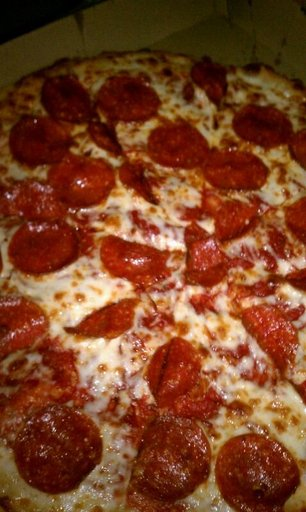

In [15]:
img

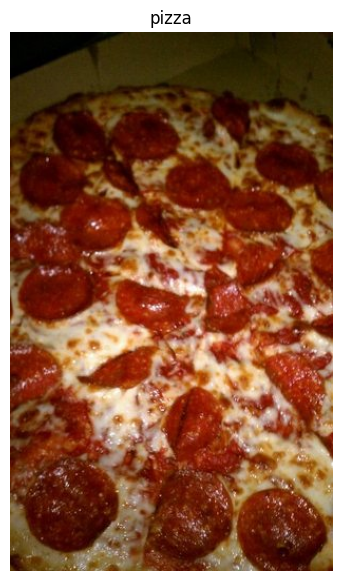

In [28]:
plt.figure(figsize=(10, 7))
plt.imshow(img)
plt.axis(False)
plt.title(f"{image_class}");

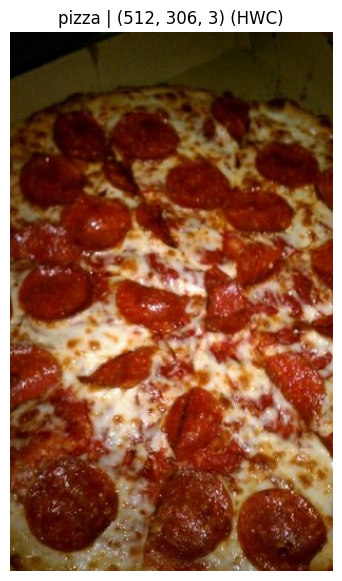

In [29]:
img_as_array = np.asarray(img)
plt.figure(figsize=(10, 7))
plt.imshow(img)
plt.axis(False)
plt.title(f"{image_class} | {img_as_array.shape} (HWC)");

In [30]:
# turn target data into tensors
import torch
from torch.utils.data import Dataset
from torchvision import datasets, transforms


In [78]:
train_transform = transforms.Compose([
    # resize
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
test_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])


In [ ]:
transformed_img = train_transform(img)
transformed_img, transformed_img.shape

(tensor([[[0.0039, 0.0039, 0.0078,  ..., 0.1725, 0.1529, 0.1059],
          [0.0000, 0.0039, 0.0078,  ..., 0.1804, 0.1765, 0.1137],
          [0.0039, 0.0039, 0.0039,  ..., 0.1843, 0.1961, 0.1882],
          ...,
          [0.3765, 0.3686, 0.3843,  ..., 0.3373, 0.5333, 0.5922],
          [0.2118, 0.2588, 0.3608,  ..., 0.4941, 0.5176, 0.5176],
          [0.2314, 0.2275, 0.3059,  ..., 0.4471, 0.4549, 0.4078]],
 
         [[0.0039, 0.0039, 0.0078,  ..., 0.1255, 0.1059, 0.0706],
          [0.0078, 0.0118, 0.0118,  ..., 0.1373, 0.1451, 0.0902],
          [0.0118, 0.0118, 0.0118,  ..., 0.1451, 0.1490, 0.1451],
          ...,
          [0.2706, 0.2627, 0.2863,  ..., 0.1922, 0.4118, 0.4745],
          [0.0784, 0.1137, 0.2235,  ..., 0.3725, 0.4078, 0.3922],
          [0.0941, 0.0667, 0.1490,  ..., 0.2941, 0.2941, 0.2118]],
 
         [[0.0000, 0.0000, 0.0000,  ..., 0.0157, 0.0157, 0.0118],
          [0.0000, 0.0000, 0.0000,  ..., 0.0078, 0.0196, 0.0196],
          [0.0000, 0.0000, 0.0000,  ...,

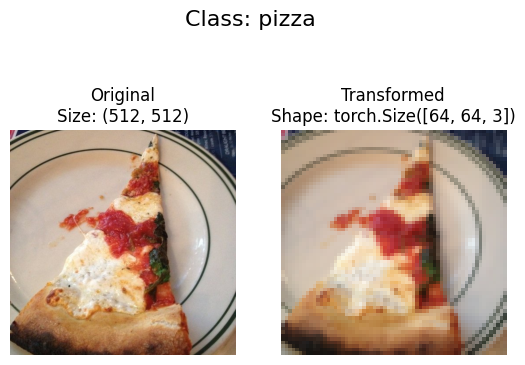

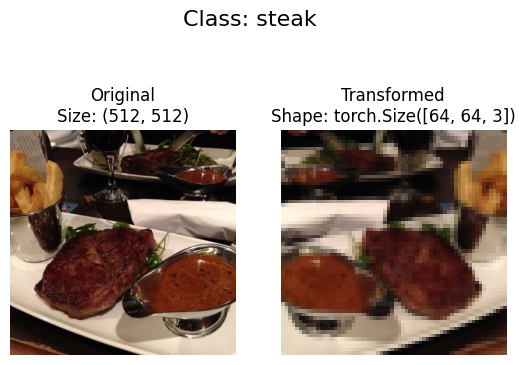

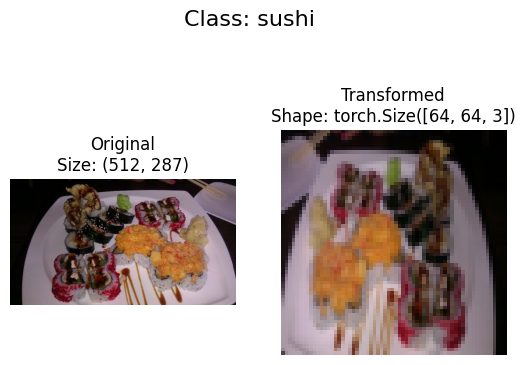

In [80]:
def plot_transformed_images(image_paths, transform, n=3, seed=None):
    if seed:
        random.seed(seed)
    
    random_image_paths = random.sample(image_paths,k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fix, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)

            transformed_image = transform(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")  # set_title or title...
            ax[1].axis("off")

            fix.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list, transform=train_transform)

Option 1: Loading image data using `ImageFolder`

In [81]:
# create Dataset

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=train_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=test_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [82]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [42]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [43]:
train_data.targets[0]


0

In [83]:
train_data[0]


(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

Turn loaded image into `DataLoader`

In [84]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x12ce7b110>,
 <torch.utils.data.dataloader.DataLoader at 0x12cd66990>)

In [57]:
# ien(train_dataloader) == len(train_data) // BATCH_SIZE
len(train_dataloader), len(train_data), len(test_dataloader), len(test_data)

(225, 225, 75, 75)

In [62]:
img, label = next(iter(train_dataloader))
img, label

(tensor([[[[0.2745, 0.1529, 0.1255,  ..., 0.4549, 0.4667, 0.5569],
           [0.2510, 0.1608, 0.1529,  ..., 0.4353, 0.4235, 0.4431],
           [0.1686, 0.1412, 0.1686,  ..., 0.3451, 0.3333, 0.3294],
           ...,
           [0.9059, 0.9137, 0.9216,  ..., 0.9608, 0.9569, 0.9529],
           [0.9020, 0.9137, 0.9216,  ..., 0.9569, 0.9569, 0.9529],
           [0.9020, 0.9137, 0.9216,  ..., 0.9569, 0.9529, 0.9490]],
 
          [[0.2431, 0.1020, 0.0784,  ..., 0.4627, 0.4706, 0.5725],
           [0.2118, 0.0980, 0.0941,  ..., 0.4431, 0.4196, 0.4353],
           [0.1255, 0.0902, 0.0980,  ..., 0.3412, 0.3216, 0.3098],
           ...,
           [0.9608, 0.9686, 0.9725,  ..., 1.0000, 0.9961, 0.9922],
           [0.9569, 0.9686, 0.9725,  ..., 0.9961, 0.9961, 0.9922],
           [0.9569, 0.9647, 0.9725,  ..., 0.9961, 0.9922, 0.9882]],
 
          [[0.2000, 0.0392, 0.0157,  ..., 0.5412, 0.5686, 0.6902],
           [0.1490, 0.0275, 0.0157,  ..., 0.5098, 0.4745, 0.4980],
           [0.0510, 0.01

In [64]:
# img is a batch of the images
img.shape

torch.Size([32, 3, 64, 64])

Option 2: Loading image data with a custom `Dataset`

In [68]:
# create a helper function to get class_names
target_directory = train_dir

class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

['pizza', 'steak', 'sushi']

In [69]:
def find_classes(directory: str) -> tuple[list[str], dict[str, int]]:
    class_names = sorted([entry.name for entry in list(os.scandir(target_directory))])
    if not class_names:
        raise FileNotFoundError("dir not found in {directory}")
    
    class_to_idx = {class_name:idx for idx, class_name in enumerate(class_names)}
    return class_names, class_to_idx


In [70]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [90]:
from torch.utils.data import Dataset

# custom Dataset
class ImageFolderCustom(Dataset):
    def __init__(self,
                 target_dir:str, # upto the train directory or test directory in our case
                 transform=None):
        super().__init__()
        self.paths = list(Path(target_dir).glob("*/*.jpg"))
        self.transform = transform

        self.classes, self.class_to_idx = find_classes(target_dir)

    def load_image(self, index: int) ->Image.Image:
        image_path = self.paths[index]
        return Image.open(image_path)

    def __getitem__(self, index:int) -> tuple[torch.Tensor, int]:
        img = self.load_image(index)
        class_name = self.paths[index].parent.stem
        class_index=self.class_to_idx[class_name]

        if self.transform:
            return self.transform(img), class_index
        else:
            return img, class_index

    def __len__(self) -> int:
        return len(self.paths)



In [91]:
# Test dataset
train_data_custom = ImageFolderCustom(target_dir=train_dir,
                                      transform=train_transform)

test_data_custom = ImageFolderCustom(target_dir=test_dir,
                                     transform=test_transform)

In [96]:
len(train_data_custom), len(train_data), len(test_data_custom), len(test_data)

(225, 225, 75, 75)

In [97]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [98]:
train_data_custom.classes, train_data.classes

(['pizza', 'steak', 'sushi'], ['pizza', 'steak', 'sushi'])

In [ ]:
# as usually we can create dataloader from our custom dataset
BATCH_SIZE = 1
NUM_WORKERS = os.cpu_count()

train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x12e3555e0>,
 <torch.utils.data.dataloader.DataLoader at 0x12f2ddfa0>)

In [ ]:
# Data augmentation
# adding artificially diversity to the training data: rotate, shift, zoom, crop, replace, shear, etc Hope to result in a more generalizable to unseen data

# example: TrvialAugment

train_trainsform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=5),
    transforms.ToTensor()
])

# no need augmentation
test_trainsform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])